In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
import pandas as pd

# Read CSV file excluding lines with parsing errors
df = pd.read_csv("Financial_data_stocks.csv", error_bad_lines=False)

# Now you can proceed with your analysis


<ipython-input-7-6ba2c0037273>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("Financial_data_stocks.csv", error_bad_lines=False)


In [8]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Return,Volatility
0,AXP,2004-01-02,42.390778,42.495815,41.778069,41.795574,31.080769,3041586,-0.014041,0.016932
1,AXP,2004-01-05,42.084423,42.303249,41.856846,42.163200,31.354137,4229407,0.001872,0.010607
2,AXP,2004-01-06,41.970634,42.303249,41.953129,42.233227,31.406221,4138924,0.006257,0.008342
3,AXP,2004-01-07,42.399532,42.399532,42.084423,42.355766,31.497335,4480635,-0.001032,0.007432
4,AXP,2004-01-08,42.434544,42.653370,41.839340,42.233227,31.406221,6395407,-0.004744,0.019183


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Return,Volatility
count,139865.000000,139865.000000,139865.000000,139865.000000,139865.000000,1.398650e+05,139865.000000,139865.000000
mean,90.923992,91.780001,90.060007,90.936710,76.812011,2.687334e+07,0.000263,0.019648
std,72.828599,73.528470,72.118732,72.835486,71.269082,1.064595e+08,0.014068,0.014109
min,0.382500,0.388393,0.378214,0.380000,0.321708,2.019000e+05,-0.168646,0.000412
25%,40.499138,40.919998,40.035000,40.499138,28.796164,4.289000e+06,-0.006463,0.011573
50%,66.150002,66.779999,65.629997,66.209999,49.321270,7.697300e+06,0.000298,0.016082
75%,123.470001,124.550667,122.379997,123.479927,106.236908,1.494120e+07,0.007038,0.023073
max,555.000000,558.099976,550.130005,555.150024,551.089966,3.372970e+09,0.294574,0.376353


In [10]:
# Check number of null values in each column
null_counts = df.isnull().sum()
print(null_counts)


Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Return        0
Volatility    0
dtype: int64


In [11]:
unique_values = df['Unnamed: 0'].unique()
print(unique_values)



['AXP' 'AMGN' 'AAPL' 'BA' 'CAT' 'CSCO' 'CVX' 'GS' 'HD' 'HON' 'IBM' 'INTC'
 'JNJ' 'KO' 'JPM' 'MCD' 'MMM' 'MRK' 'MSFT' 'NKE' 'PG' 'TRV' 'UNH' 'VZ' 'V'
 'WBA' 'WMT' 'DIS']


In [12]:
# Find the row where the value is '109.80000305175781'
row_with_value = df[df['Unnamed: 0'] == '109.80000305175781']
print(row_with_value)


Empty DataFrame
Columns: [Unnamed: 0, Date, Open, High, Low, Close, Adj Close, Volume, Return, Volatility]
Index: []


In [13]:
# Drop the row where the value is '109.80000305175781' in the 'Unnamed: 0' column
df = df[df['Unnamed: 0'] != '109.80000305175781']

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Print the DataFrame to confirm changes
print(df)


       Unnamed: 0        Date       Open       High        Low      Close  \
0             AXP  2004-01-02  42.390778  42.495815  41.778069  41.795574   
1             AXP  2004-01-05  42.084423  42.303249  41.856846  42.163200   
2             AXP  2004-01-06  41.970634  42.303249  41.953129  42.233227   
3             AXP  2004-01-07  42.399532  42.399532  42.084423  42.355766   
4             AXP  2004-01-08  42.434544  42.653370  41.839340  42.233227   
...           ...         ...        ...        ...        ...        ...   
139860        DIS  2023-12-22  91.620003  92.239998  90.750000  91.019997   
139861        DIS  2023-12-26  90.839996  91.269997  90.599998  90.949997   
139862        DIS  2023-12-27  90.910004  90.940002  90.040001  90.379997   
139863        DIS  2023-12-28  90.089996  90.980003  89.970001  90.400002   
139864        DIS  2023-12-29  90.120003  90.599998  89.860001  90.290001   

        Adj Close    Volume    Return  Volatility  
0       31.080769   304

In [14]:
df.rename(columns={'Unnamed: 0': 'Stocks'}, inplace=True)



In [15]:
import pandas as pd

# Define a function to parse dates safely
def safe_parse_date(date_str):
    try:
        return pd.to_datetime(date_str)
    except (TypeError, ValueError):
        return pd.NaT  # Return NaT (Not a Time) for invalid dates

# Filter out rows with invalid dates and parse the remaining dates
df_valid_dates = df[df['Date'].apply(lambda x: len(str(x)) <= 10)]  # Assuming valid dates have length less than or equal to 10
df_valid_dates['Date'] = df_valid_dates['Date'].apply(safe_parse_date)

# Drop rows with NaT (invalid dates)
df_valid_dates = df_valid_dates.dropna(subset=['Date'])

# Find the smallest and largest dates
smallest_date = df_valid_dates['Date'].min()
largest_date = df_valid_dates['Date'].max()

print("Smallest Date:", smallest_date)
print("Largest Date:", largest_date)


Smallest Date: 2004-01-02 00:00:00
Largest Date: 2023-12-29 00:00:00


In [2]:
import pandas as pd

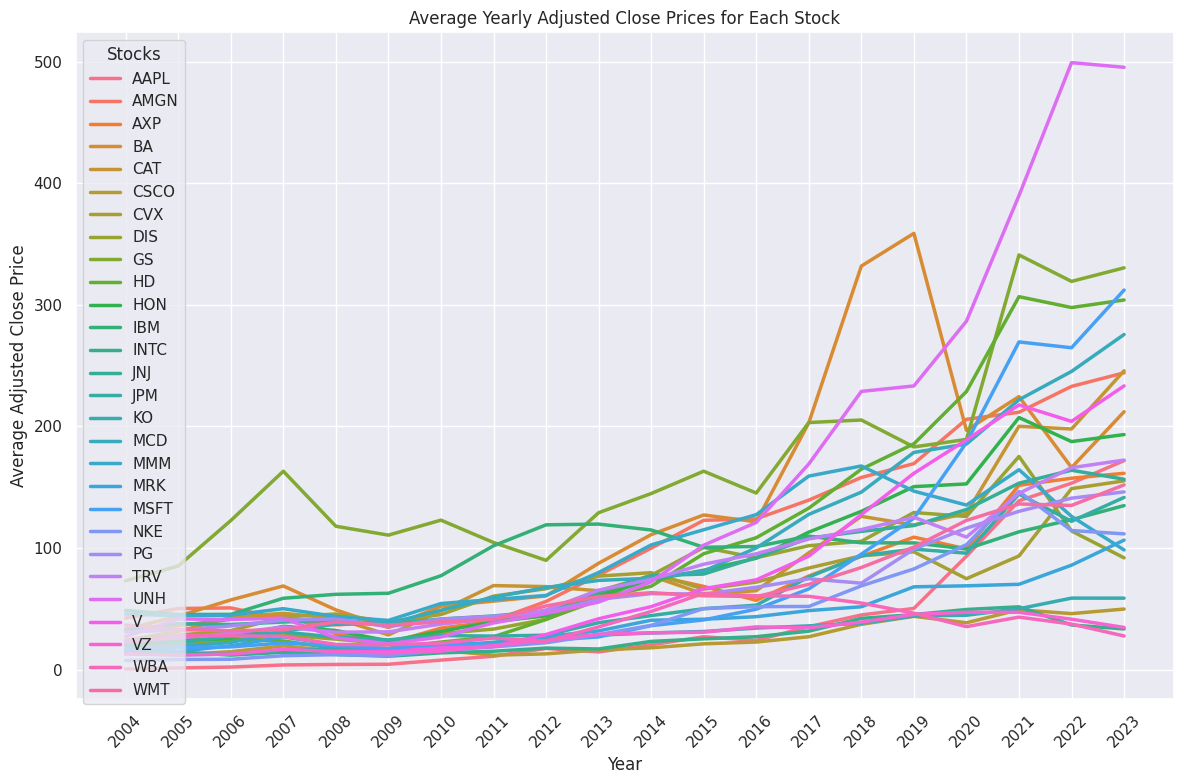

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Convert 'Year' column to integer data type
df['Year'] = df['Year'].astype(int)

# Group by 'Stocks' and 'Year', compute the mean adjusted close price for each group
df_yearly_avg = df.groupby(['Stocks', 'Year'])['Adj Close'].mean().reset_index()

# Set the style
sns.set(style="darkgrid")

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_yearly_avg, x='Year', y='Adj Close', hue='Stocks', linewidth=2.5)
plt.title('Average Yearly Adjusted Close Prices for Each Stock')
plt.xlabel('Year')
plt.ylabel('Average Adjusted Close Price')
plt.xticks(range(df_yearly_avg['Year'].min(), df_yearly_avg['Year'].max() + 1), rotation=45)  # Set x-axis ticks for each year
plt.legend(title='Stocks', loc='upper left')
plt.tight_layout()
plt.show()


In [23]:
# Create a pivot table with year as rows, stocks as columns, and average adjusted close prices as values
pivot_table = df_yearly_avg.pivot_table(index='Year', columns='Stocks', values='Adj Close', aggfunc='mean')

# Display the pivot table
print("Pivot Table of Average Yearly Adjusted Close Prices for Each Stock:")
print(pivot_table)


Pivot Table of Average Yearly Adjusted Close Prices for Each Stock:
Stocks        AAPL        AMGN         AXP          BA         CAT       CSCO  \
Year                                                                            
2004      0.537091   42.342000   33.724496   33.133414   24.112553  14.769382   
2005      1.411282   50.284476   36.210932   44.009659   31.371135  12.416837   
2006      2.141009   50.783503   41.340702   57.357738   43.055248  14.776742   
2007      3.878451   41.640398   45.469440   68.835930   46.374349  19.536313   
2008      4.292834   36.763991   29.481443   49.167051   42.228724  15.369860   
2009      4.439027   39.476945   21.703066   34.612338   28.560126  13.669047   
2010      7.856518   40.078175   34.174448   52.204054   48.426599  15.866187   
2011     11.005924   40.395626   39.600560   56.358392   69.132682  11.936760   
2012     17.459526   56.070816   47.415816   60.656818   68.302582  12.990762   
2013     14.613348   77.743068   62.51795

**General Trends:**

Most stocks show an increasing trend in average yearly adjusted close prices over the years.

Some stocks, like AAPL, have experienced significant growth over the years, indicating strong performance.

**Economic Events and Market Conditions:**

The global financial crisis of 2008 had a noticeable impact on stock prices, with many stocks experiencing a dip in average prices in that year.

Recovery post-2008 crisis can be observed with most stocks showing an upward trend in subsequent years.

Periods of economic growth and stability, such as the mid-2010s, are reflected in the overall upward trajectory of stock prices.

Certain individual events or industry-specific conditions may have influenced particular stocks' performance in specific years.

**Industry-Specific Insights:**

Technology stocks like AAPL, MSFT, and AMGN have shown significant growth over the years, reflecting the rapid advancements and increased demand in the technology sector.

Pharmaceutical and healthcare stocks like MRK, UNH, and AMGN also demonstrate steady growth, possibly due to the increasing demand for healthcare services and products.

Consumer goods stocks like PG, HD, and WMT show relatively stable growth, reflecting consistent consumer demand for essential products.

Financial sector stocks like GS and JPM show fluctuating trends, possibly influenced by regulatory changes, market conditions, and economic cycles.

**Comparative Performance:**

Comparing the growth rates of different stocks can provide insights into relative market performance and investor sentiment towards various industries and companies.

Observing the relative growth rates of stocks within the same industry can indicate market share dynamics and competitive positioning.

**Outliers and Anomalies:**

Any significant deviations or anomalies in the trends should be investigated further to understand the underlying causes, which could include company-specific events, market dynamics, or data errors.

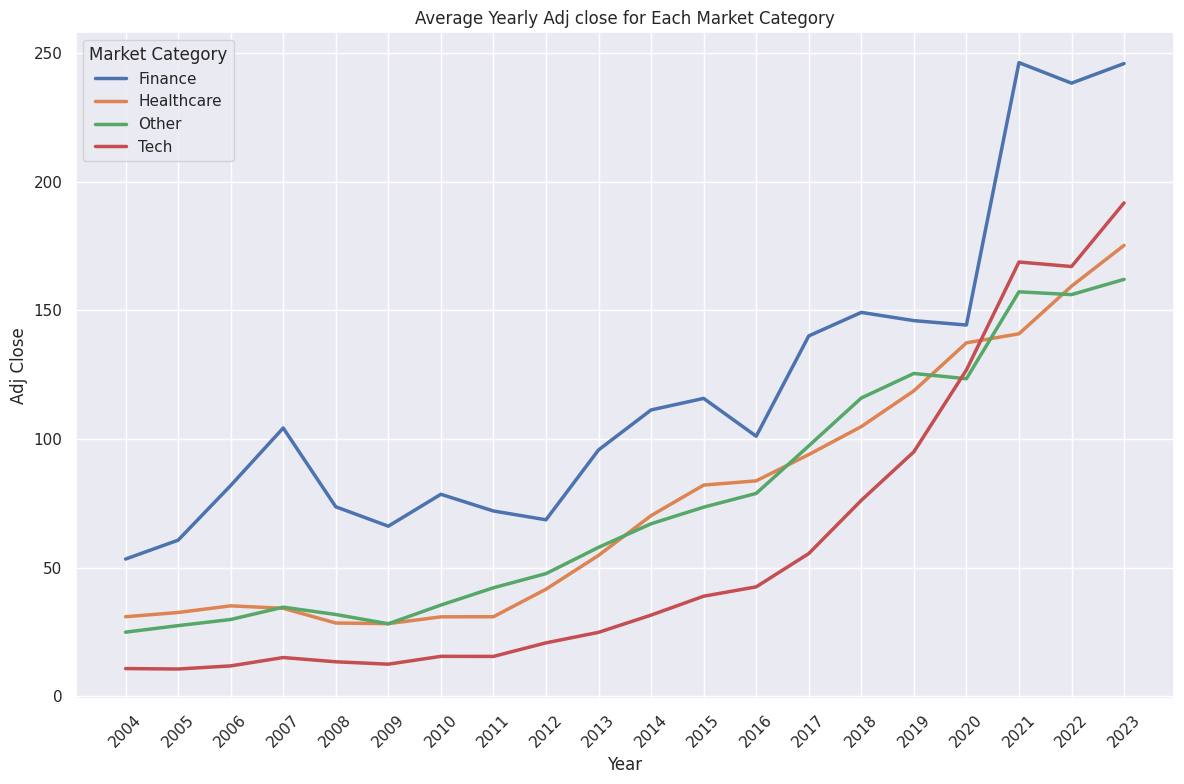

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the stock data

# Define a function to categorize the stocks
def categorize_stocks(stock):
    tech_stocks = ['AAPL', 'MSFT', 'CSCO', 'V']
    finance_stocks = ['AXP', 'GS']
    healthcare_stocks = ['AMGN', 'MRK']

    if stock in tech_stocks:
        return 'Tech'
    elif stock in finance_stocks:
        return 'Finance'
    elif stock in healthcare_stocks:
        return 'Healthcare'
    else:
        return 'Other'

# Apply the categorize_stocks function to create a new column 'Market Category'
df['Market Category'] = df['Stocks'].apply(categorize_stocks)

# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Convert 'Year' column to integer data type
df['Year'] = df['Year'].astype(int)

# Group by 'Market Category' and 'Year', compute the mean volume for each group
df_yearly_avg = df.groupby(['Market Category', 'Year'])['Adj Close'].mean().reset_index()

# Set the style
sns.set(style="darkgrid")

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_yearly_avg, x='Year', y='Adj Close', hue='Market Category', linewidth=2.5)
plt.title('Average Yearly Adj close for Each Market Category')
plt.xlabel('Year')
plt.ylabel('Adj Close')
plt.xticks(range(df_yearly_avg['Year'].min(), df_yearly_avg['Year'].max() + 1), rotation=45)  # Set x-axis ticks for each year
plt.legend(title='Market Category', loc='upper left')
plt.tight_layout()
plt.show()


In [38]:
# Create a pivot table of average yearly volume for each market category
pivot_table = df_yearly_avg.pivot_table(index='Year', columns='Market Category', values='Adj Close', aggfunc='mean')

# Display the pivot table
print("Pivot Table of Average Yearly Adj Close for Each Market Category:")
print(pivot_table)


Pivot Table of Average Yearly Adj Close for Each Market Category:
Market Category     Finance  Healthcare       Other        Tech
Year                                                           
2004              53.393301   30.975992   24.989476   10.837472
2005              60.731174   32.632019   27.524156   10.665547
2006              81.967734   35.211886   29.905542   11.875655
2007             104.324795   34.268888   34.696896   15.129391
2008              73.707986   28.535675   31.855615   13.475457
2009              66.169467   28.303707   28.241858   12.546626
2010              78.564876   30.934706   35.517154   15.586759
2011              72.078013   30.984871   42.232127   15.560463
2012              68.657371   41.682069   47.731307   20.830849
2013              95.796028   54.815103   57.935106   24.915736
2014             111.344045   70.280775   67.112049   31.614962
2015             115.827828   82.139688   73.558248   38.957391
2016             101.126376   83.78796

**Finance Category:**

Sudden Growth: In 2021, there was a remarkable spike in the average yearly adjusted close for finance stocks, jumping from around 150 to over 240. This could be attributed to several factors such as increased investor confidence due to economic recovery post-pandemic, favorable regulatory changes, or strong financial performance from key players in the finance sector.

Dip: The dip in 2008 is notable, where the average yearly adjusted close dropped from over 100 to around 70. This dip corresponds with the global financial crisis triggered by the subprime mortgage crisis and the collapse of major financial institutions. Investor confidence plummeted, leading to a sharp decline in stock prices across the finance sector.

**Healthcare Category:**

Sudden Growth: In 2022 and 2023, healthcare stocks experienced significant spikes in average yearly adjusted close, reaching levels above 150. This sudden growth could be attributed to breakthroughs in medical research, advancements in healthcare technology, or increased demand for healthcare services due to aging populations and emerging health crises.
Dip: A dip in 2009 is observed, where the average yearly adjusted close dropped from around 30 to 28. This dip might be linked to the broader market downturn during the global financial crisis. Additionally, uncertainties surrounding healthcare policies and regulatory changes could have influenced investor sentiment.

**Other Category:**

Sudden Growth: The sudden growth observed in 2021, with the average yearly adjusted close surpassing 150, could be associated with renewed investor confidence following economic recovery efforts post-pandemic. Strong corporate earnings reports or sector-specific developments may have also contributed to this growth.
Dip: A notable dip occurred in 2008, aligning with the global financial crisis. The average yearly adjusted close decreased from around 35 to 25, reflecting the broader market turmoil and investor panic that affected stocks across various sectors, including those classified under "Other."

**Tech Category:**

Sudden Growth: The tech sector witnessed significant growth throughout the years, with notable spikes in 2021 and 2023, where the average yearly adjusted close exceeded 160. This growth could be attributed to several factors, including increased adoption of technology amid digital transformation efforts, strong earnings reports from tech giants, and optimism surrounding innovation and disruption.
Dip: A dip in 2008 is evident, aligning with the global financial crisis. The average yearly adjusted close dropped from approximately 15 to 13, reflecting the impact of the economic downturn on technology stocks. Reduced consumer spending, decreased IT budgets by businesses, and concerns about future growth prospects likely contributed to this dip.

In [ ]:
## Volume Time series

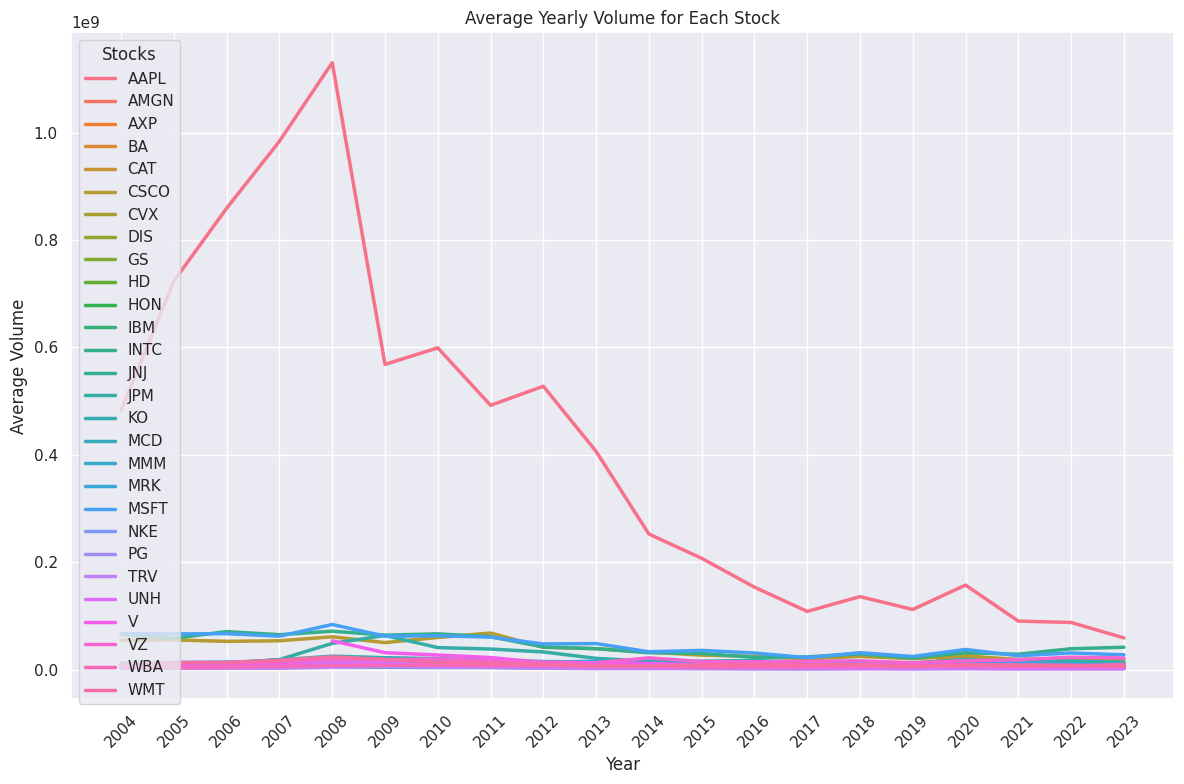

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Convert 'Year' column to integer data type
df['Year'] = df['Year'].astype(int)

# Group by 'Stocks' and 'Year', compute the mean adjusted close price for each group
df_yearly_avg = df.groupby(['Stocks', 'Year'])['Volume'].mean().reset_index()

# Set the style
sns.set(style="darkgrid")

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_yearly_avg, x='Year', y='Volume', hue='Stocks', linewidth=2.5)
plt.title('Average Yearly Volume for Each Stock')
plt.xlabel('Year')
plt.ylabel('Average Volume')
plt.xticks(range(df_yearly_avg['Year'].min(), df_yearly_avg['Year'].max() + 1), rotation=45)  # Set x-axis ticks for each year
plt.legend(title='Stocks', loc='upper left')
plt.tight_layout()
plt.show()


In [25]:
# Pivot the DataFrame to create a table of average yearly volume for each stock
volume_table = df_yearly_avg.pivot_table(index='Year', columns='Stocks', values='Volume')

# Display the pivot table
print("Pivot Table of Average Yearly Volume for Each Stock:")
print(volume_table)


Pivot Table of Average Yearly Volume for Each Stock:
Stocks          AAPL          AMGN           AXP            BA           CAT  \
Year                                                                           
2004    4.833400e+08  8.346854e+06  4.447737e+06  3.162882e+06  4.859075e+06   
2005    7.238134e+08  8.172196e+06  5.741666e+06  3.882917e+06  4.894258e+06   
2006    8.593584e+08  8.885043e+06  4.928749e+06  3.978582e+06  5.686916e+06   
2007    9.840478e+08  1.299313e+07  7.461763e+06  5.302289e+06  6.249957e+06   
2008    1.130360e+09  1.088040e+07  1.484678e+07  7.714334e+06  8.596679e+06   
2009    5.684670e+08  8.318898e+06  1.918076e+07  6.878462e+06  1.277897e+07   
2010    5.993053e+08  6.684545e+06  1.092033e+07  5.848963e+06  8.552932e+06   
2011    4.922990e+08  6.931534e+06  7.886322e+06  5.599934e+06  8.657510e+06   
2012    5.278568e+08  4.599123e+06  5.627034e+06  4.396594e+06  7.026077e+06   
2013    4.064348e+08  3.913050e+06  4.762973e+06  5.187506e+06  5.9

**Historical Volume Trend:**

Apple's average yearly trading volume has shown significant variability over the years.
From 2004 to around 2008, Apple experienced a substantial increase in trading volume, reaching its peak in 2008. This period coincides with significant milestones for the company, including the launch of iconic products like the iPhone and MacBook.
However, after 2008, Apple's trading volume started to decline gradually, indicating potential shifts in investor sentiment or changes in market dynamics.

**Sectoral Trends:**

Grouping stocks by sector (e.g., technology, healthcare, finance) and analyzing volume trends within each sector can reveal sector-specific patterns and dynamics.
For example, technology stocks like AAPL and MSFT might exhibit higher average volumes compared to stocks in other sectors due to the high level of investor interest and trading activity in the technology industry.



In [32]:
### Grouped Categories w.r.t Volume

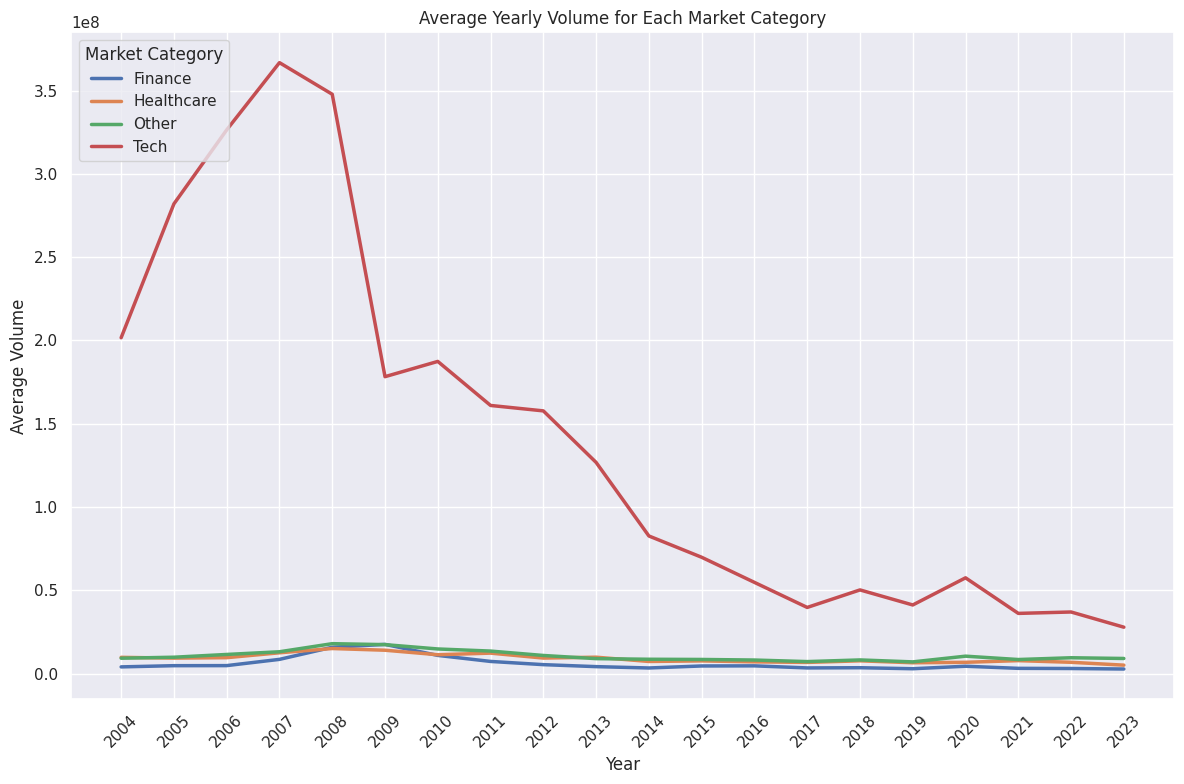

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the stock data

# Define a function to categorize the stocks
def categorize_stocks(stock):
    tech_stocks = ['AAPL', 'MSFT', 'CSCO', 'V']
    finance_stocks = ['AXP', 'GS']
    healthcare_stocks = ['AMGN', 'MRK']

    if stock in tech_stocks:
        return 'Tech'
    elif stock in finance_stocks:
        return 'Finance'
    elif stock in healthcare_stocks:
        return 'Healthcare'
    else:
        return 'Other'

# Apply the categorize_stocks function to create a new column 'Market Category'
df['Market Category'] = df['Stocks'].apply(categorize_stocks)

# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Convert 'Year' column to integer data type
df['Year'] = df['Year'].astype(int)

# Group by 'Market Category' and 'Year', compute the mean volume for each group
df_yearly_avg = df.groupby(['Market Category', 'Year'])['Volume'].mean().reset_index()

# Set the style
sns.set(style="darkgrid")

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_yearly_avg, x='Year', y='Volume', hue='Market Category', linewidth=2.5)
plt.title('Average Yearly Volume for Each Market Category')
plt.xlabel('Year')
plt.ylabel('Average Volume')
plt.xticks(range(df_yearly_avg['Year'].min(), df_yearly_avg['Year'].max() + 1), rotation=45)  # Set x-axis ticks for each year
plt.legend(title='Market Category', loc='upper left')
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd

# Assuming df is your DataFrame containing the stock data

# Define a function to categorize the stocks
def categorize_stocks(stock):
    tech_stocks = ['AAPL', 'MSFT', 'CSCO', 'V']
    finance_stocks = ['AXP', 'GS']
    healthcare_stocks = ['AMGN', 'MRK']

    if stock in tech_stocks:
        return 'Tech'
    elif stock in finance_stocks:
        return 'Finance'
    elif stock in healthcare_stocks:
        return 'Healthcare'
    else:
        return 'Other'

# Apply the categorize_stocks function to create a new column 'Market Category'
df['Market Category'] = df['Stocks'].apply(categorize_stocks)

# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Convert 'Year' column to integer data type
df['Year'] = df['Year'].astype(int)

# Group by 'Market Category' and 'Year', compute the mean volume for each group
df_yearly_avg = df.groupby(['Market Category', 'Year'])['Volume'].mean().reset_index()

# Pivot the table to get the average yearly volume for each market category
pivot_table = df_yearly_avg.pivot_table(index='Year', columns='Market Category', values='Volume', aggfunc='mean')

# Display the pivot table
print("Pivot Table of Average Yearly Volume for Each Market Category:")
print(pivot_table)


Pivot Table of Average Yearly Volume for Each Market Category:
Market Category       Finance    Healthcare         Other          Tech
Year                                                                   
2004             4.026650e+06  9.761113e+06  9.236687e+06  2.016195e+08
2005             4.750624e+06  9.291686e+06  9.833269e+06  2.819830e+08
2006             4.790933e+06  9.561348e+06  1.149126e+07  3.263969e+08
2007             8.540122e+06  1.249342e+07  1.311026e+07  3.667642e+08
2008             1.581116e+07  1.504770e+07  1.796666e+07  3.477863e+08
2009             1.753602e+07  1.402981e+07  1.739194e+07  1.782482e+08
2010             1.091844e+07  1.132705e+07  1.478947e+07  1.874064e+08
2011             7.302148e+06  1.228498e+07  1.352180e+07  1.609761e+08
2012             5.373934e+06  9.315659e+06  1.088274e+07  1.577106e+08
2013             4.179098e+06  9.849273e+06  8.978156e+06  1.267748e+08
2014             3.375751e+06  7.282103e+06  8.606355e+06  8.261846e+07
2

**Finance Category:**

The average yearly volume for finance stocks shows a fluctuating trend over the years, with peaks observed in 2008, 2009, and 2010, followed by a gradual decline.
The spike in volume in 2008 could be attributed to increased trading activity during the financial crisis, as investors reacted to market turbulence and sought to adjust their portfolios.
Subsequent years saw a gradual decline in volume, possibly reflecting a stabilization of the financial markets and reduced volatility compared to the crisis period.

**Healthcare Category:**

Healthcare stocks demonstrate relatively steady average yearly volume over the years, with minor fluctuations.
The volume remains consistently high, indicating sustained investor interest and trading activity in the healthcare sector.
This stability suggests that healthcare stocks may be perceived as defensive or less volatile investments, attracting steady trading volumes even during market uncertainties.

**Other Category:**

The average yearly volume for stocks categorized under "Other" exhibits varying trends over the years.
There is a notable increase in volume in 2020, potentially driven by heightened market volatility and trading activity amid the COVID-19 pandemic.
The subsequent years show fluctuations, with volumes remaining relatively elevated compared to earlier years, indicating ongoing investor interest and trading in diverse sectors beyond finance, healthcare, and tech.

**Tech Category:**

Technology stocks demonstrate a declining trend in average yearly volume over the years, with a peak observed in the early 2000s followed by a gradual decrease.
The decline in volume may be attributed to market saturation, maturation of the technology sector, and shifts in investor preferences towards other emerging sectors.
Despite the decline, technology stocks continue to attract significant trading volumes, reflecting their importance in modern investment portfolios and ongoing innovation in the tech industry.

In [39]:
df.head()

,Stocks,Date,Open,High,Low,Close,Adj Close,Volume,Return,Volatility,Year,Market Category
0,AXP,2004-01-02,42.390778,42.495815,41.778069,41.795574,31.080769,3041586,-0.014041,0.016932,2004,Finance
1,AXP,2004-01-05,42.084423,42.303249,41.856846,42.163200,31.354137,4229407,0.001872,0.010607,2004,Finance
2,AXP,2004-01-06,41.970634,42.303249,41.953129,42.233227,31.406221,4138924,0.006257,0.008342,2004,Finance
3,AXP,2004-01-07,42.399532,42.399532,42.084423,42.355766,31.497335,4480635,-0.001032,0.007432,2004,Finance
4,AXP,2004-01-08,42.434544,42.653370,41.839340,42.233227,31.406221,6395407,-0.004744,0.019183,2004,Finance


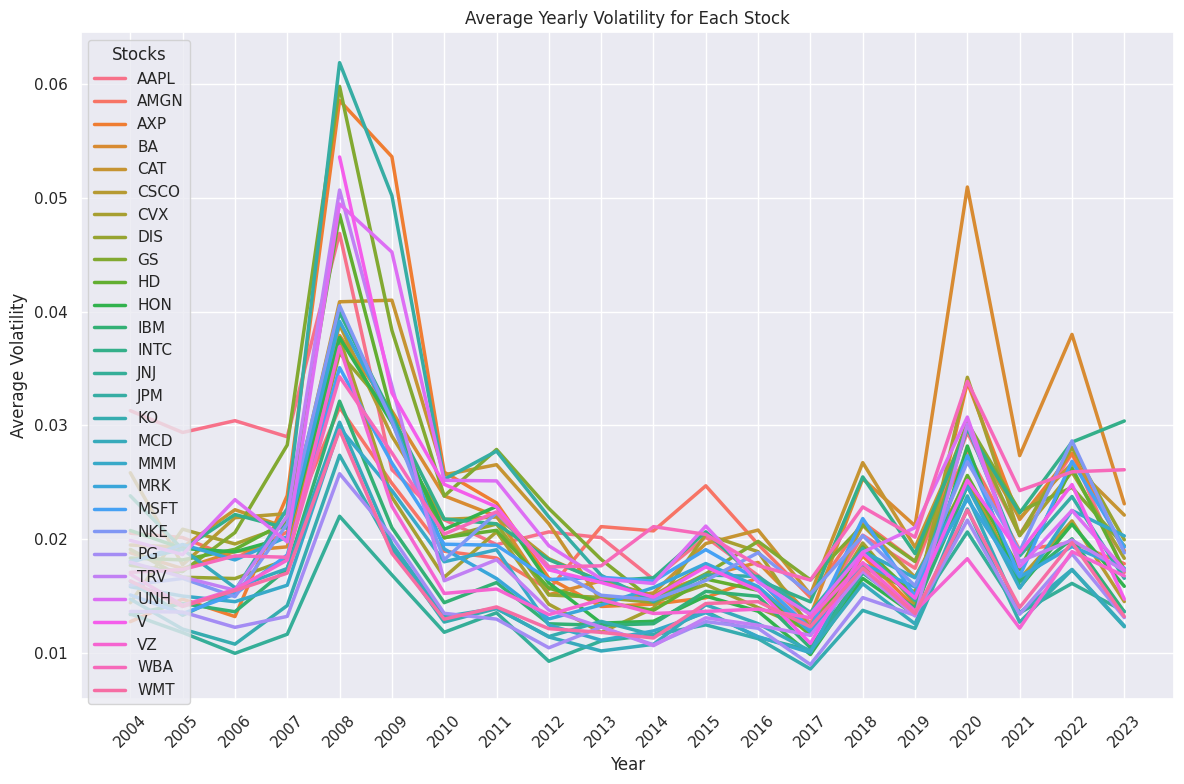

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group by 'Stocks' and 'Year', compute the mean volatility for each group
df_yearly_volatility = df.groupby(['Stocks', 'Year'])['Volatility'].mean().reset_index()

# Set the style
sns.set(style="darkgrid")

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_yearly_volatility, x='Year', y='Volatility', hue='Stocks', linewidth=2.5)
plt.title('Average Yearly Volatility for Each Stock')
plt.xlabel('Year')
plt.ylabel('Average Volatility')
plt.xticks(range(df_yearly_volatility['Year'].min(), df_yearly_volatility['Year'].max() + 1), rotation=45)  # Set x-axis ticks for each year
plt.legend(title='Stocks', loc='upper left')
plt.tight_layout()
plt.show()


In [41]:
# Pivot the DataFrame to get the average yearly volatility for each stock
pivot_table = df_yearly_volatility.pivot_table(index='Year', columns='Stocks', values='Volatility', aggfunc='mean')

# Display the pivot table
print("Pivot Table of Average Yearly Volatility for Each Stock:")
print(pivot_table)


Pivot Table of Average Yearly Volatility for Each Stock:
Stocks      AAPL      AMGN       AXP        BA       CAT      CSCO       CVX  \
Year                                                                           
2004    0.031288  0.020518  0.012738  0.018793  0.019475  0.025828  0.014399   
2005    0.029369  0.020129  0.014716  0.017403  0.019277  0.017733  0.020867   
2006    0.030405  0.018287  0.013187  0.018914  0.022577  0.021879  0.019568   
2007    0.028993  0.020622  0.023833  0.019316  0.020987  0.022236  0.021209   
2008    0.046864  0.031572  0.058551  0.037891  0.040859  0.038830  0.037684   
2009    0.026095  0.024899  0.053611  0.031250  0.040997  0.029045  0.023681   
2010    0.021703  0.018935  0.025879  0.023799  0.025650  0.021724  0.016640   
2011    0.019511  0.018330  0.023176  0.022013  0.026536  0.021937  0.020640   
2012    0.020629  0.015565  0.016559  0.015114  0.021342  0.018275  0.014272   
2013    0.020128  0.021093  0.014074  0.016322  0.014512  0.016

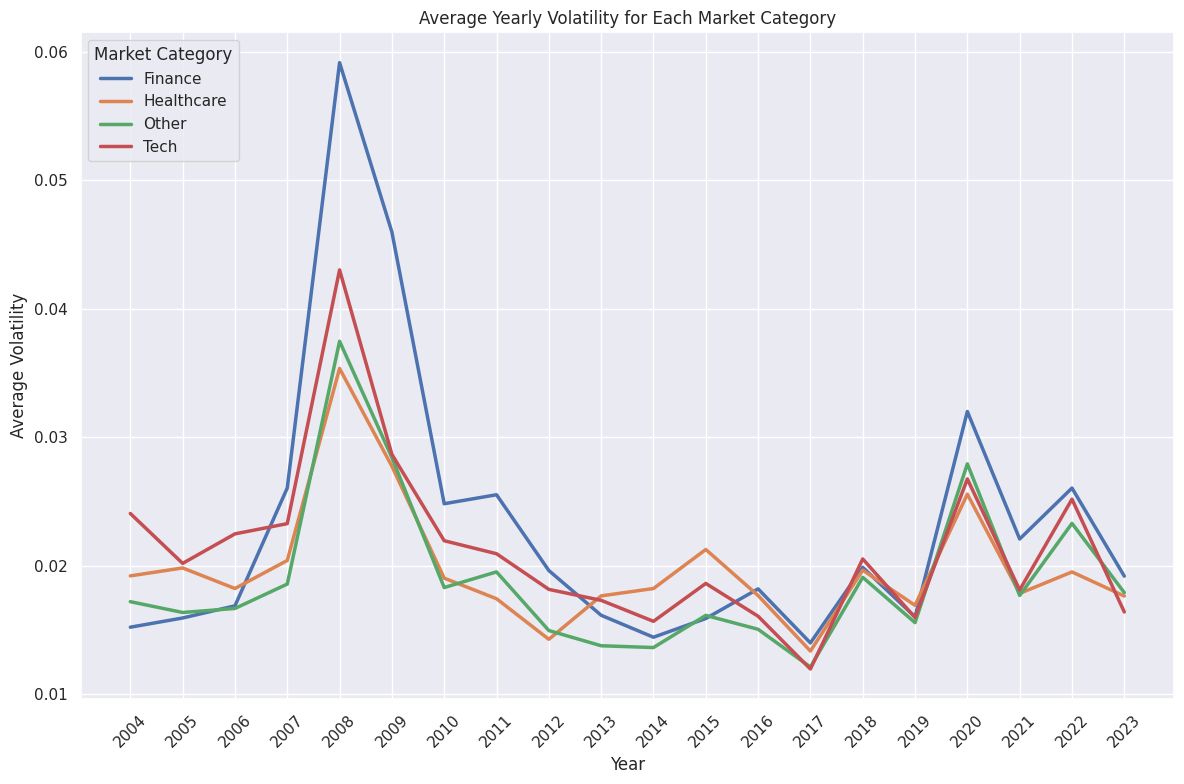

In [43]:
# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Convert 'Year' column to integer data type
df['Year'] = df['Year'].astype(int)

# Group by 'Market Category' and 'Year', compute the mean Volatility for each group
df_yearly_avg = df.groupby(['Market Category', 'Year'])['Volatility'].mean().reset_index()

# Set the style
sns.set(style="darkgrid")

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_yearly_avg, x='Year', y='Volatility', hue='Market Category', linewidth=2.5)
plt.title('Average Yearly Volatility for Each Market Category')
plt.xlabel('Year')
plt.ylabel('Average Volatility')
plt.xticks(range(df_yearly_avg['Year'].min(), df_yearly_avg['Year'].max() + 1), rotation=45)  # Set x-axis ticks for each year
plt.legend(title='Market Category', loc='upper left')
plt.tight_layout()
plt.show()


In [44]:
# Pivot the table to get the average yearly volatility for each market category
pivot_table = df_yearly_avg.pivot_table(index='Year', columns='Market Category', values='Volatility', aggfunc='mean')

# Display the pivot table
print("Pivot Table of Average Yearly Volatility for Each Market Category:")
print(pivot_table)


Pivot Table of Average Yearly Volatility for Each Market Category:
Market Category   Finance  Healthcare     Other      Tech
Year                                                     
2004             0.015214    0.019209  0.017201  0.024068
2005             0.015930    0.019827  0.016360  0.020182
2006             0.016879    0.018226  0.016672  0.022480
2007             0.026053    0.020410  0.018573  0.023277
2008             0.059170    0.035358  0.037476  0.043034
2009             0.045979    0.027743  0.028424  0.028670
2010             0.024828    0.019032  0.018302  0.021946
2011             0.025526    0.017430  0.019519  0.020934
2012             0.019624    0.014271  0.014953  0.018158
2013             0.016142    0.017652  0.013769  0.017305
2014             0.014433    0.018225  0.013630  0.015670
2015             0.015890    0.021264  0.016134  0.018622
2016             0.018197    0.017678  0.015051  0.016068
2017             0.013989    0.013355  0.012108  0.011958
2018 

**Finance Sector Volatility Peaks in 2008**: The volatility in the finance sector experienced a significant spike in 2008, reaching a peak of 0.059170. This spike corresponds to the global financial crisis that occurred during that period, which greatly affected financial markets worldwide.

**Healthcare Sector Shows Relatively Stable Volatility**: The healthcare sector generally exhibits lower volatility compared to other sectors throughout the years. This stability may be attributed to factors such as the essential nature of healthcare services and the relatively predictable demand for healthcare products.

**Tech Sector Volatility Variability**:The volatility in the technology sector shows some variability over the years. While it tends to be lower in the early years of the dataset, it becomes more pronounced in some later years, such as 2013 and 2020. This variability could be influenced by factors like innovation cycles, market sentiment towards tech stocks, and macroeconomic conditions affecting the tech industry.

**Overall Decrease in Volatility Post-2008 Financial Crisis:** Across all market categories, there appears to be a general decrease in volatility following the peak in 2008. This trend could reflect the stabilizing effects of policy interventions and regulatory measures implemented in response to the financial crisis.

**Sector-Specific Events Impact Volatility: **Volatility levels in each sector may be influenced by sector-specific events such as regulatory changes, technological advancements, earnings reports, and geopolitical developments. Understanding these events is crucial for interpreting and predicting volatility trends in each market category.

**2020 Shows Increased Volatility Across Categories:** A notable observation is the increase in volatility across all market categories in 2020. This surge in volatility can be attributed to the unprecedented events surrounding the COVID-19 pandemic, which introduced significant uncertainty and disruption to global financial markets.

**Tech Sector Maintains Higher Volatility:** Throughout the years, the technology sector tends to maintain relatively higher volatility compared to other sectors. This characteristic reflects the dynamic and rapidly evolving nature of the tech industry, driven by innovation, competition, and changing consumer preferences.

In [45]:
df.head()

,Stocks,Date,Open,High,Low,Close,Adj Close,Volume,Return,Volatility,Year,Market Category
0,AXP,2004-01-02,42.390778,42.495815,41.778069,41.795574,31.080769,3041586,-0.014041,0.016932,2004,Finance
1,AXP,2004-01-05,42.084423,42.303249,41.856846,42.163200,31.354137,4229407,0.001872,0.010607,2004,Finance
2,AXP,2004-01-06,41.970634,42.303249,41.953129,42.233227,31.406221,4138924,0.006257,0.008342,2004,Finance
3,AXP,2004-01-07,42.399532,42.399532,42.084423,42.355766,31.497335,4480635,-0.001032,0.007432,2004,Finance
4,AXP,2004-01-08,42.434544,42.653370,41.839340,42.233227,31.406221,6395407,-0.004744,0.019183,2004,Finance


In [47]:

# Data Exploration
print(df.info())  # View data types and missing values
print(df.describe())  # Summary statistics




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139865 entries, 2004-01-02 to 2023-12-29
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Stocks           139865 non-null  object 
 1   Open             139865 non-null  float64
 2   High             139865 non-null  float64
 3   Low              139865 non-null  float64
 4   Close            139865 non-null  float64
 5   Adj Close        139865 non-null  float64
 6   Volume           139865 non-null  int64  
 7   Return           139865 non-null  float64
 8   Volatility       139865 non-null  float64
 9   Year             139865 non-null  int64  
 10  Market Category  139865 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 12.8+ MB
None
                Open           High            Low          Close  \
count  139865.000000  139865.000000  139865.000000  139865.000000   
mean       90.923992      91.780001      90.060007      

<ipython-input-48-416ca6a56894>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


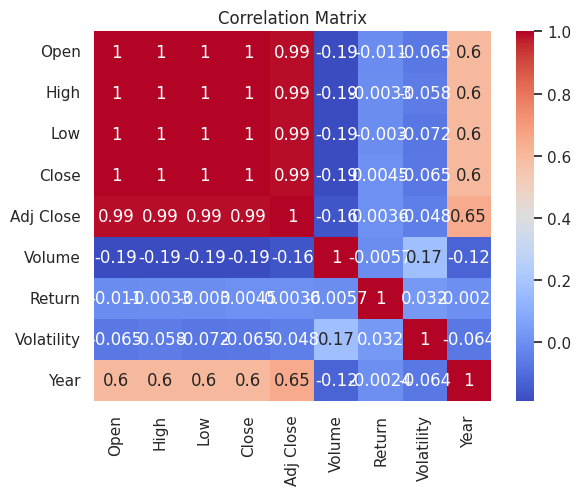

In [48]:
# Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [49]:
# Grouping and Aggregation
grouped_data = df.groupby('Market Category').mean()
print(grouped_data)


                       Open        High         Low       Close   Adj Close  \
Market Category                                                               
Finance          137.051722  138.553215  135.534290  137.064572  119.644096   
Healthcare        92.376048   93.282401   91.458705   92.385876   75.731324   
Other             91.260315   92.088734   90.423030   91.271605   75.868011   
Tech              64.038218   64.672608   63.406344   64.059925   59.759291   

                       Volume    Return  Volatility         Year  
Market Category                                                   
Finance          5.957952e+06  0.000318    0.023168  2013.496523  
Healthcare       9.113408e+06  0.000209    0.019850  2013.496523  
Other            1.062187e+07  0.000242    0.018991  2013.496523  
Tech             1.330538e+08  0.000374    0.021150  2013.933676  


<ipython-input-49-26b25e000388>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby('Market Category').mean()


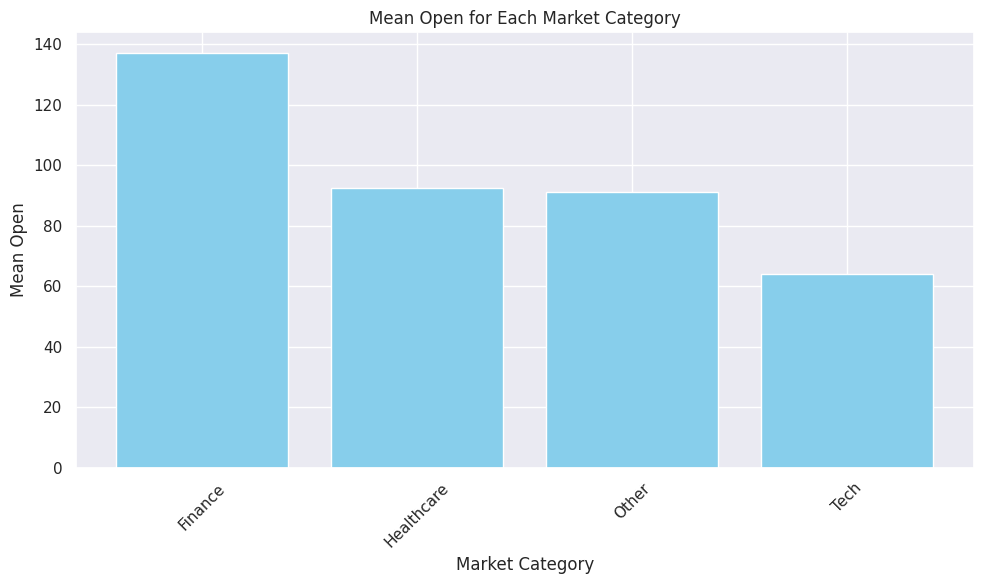

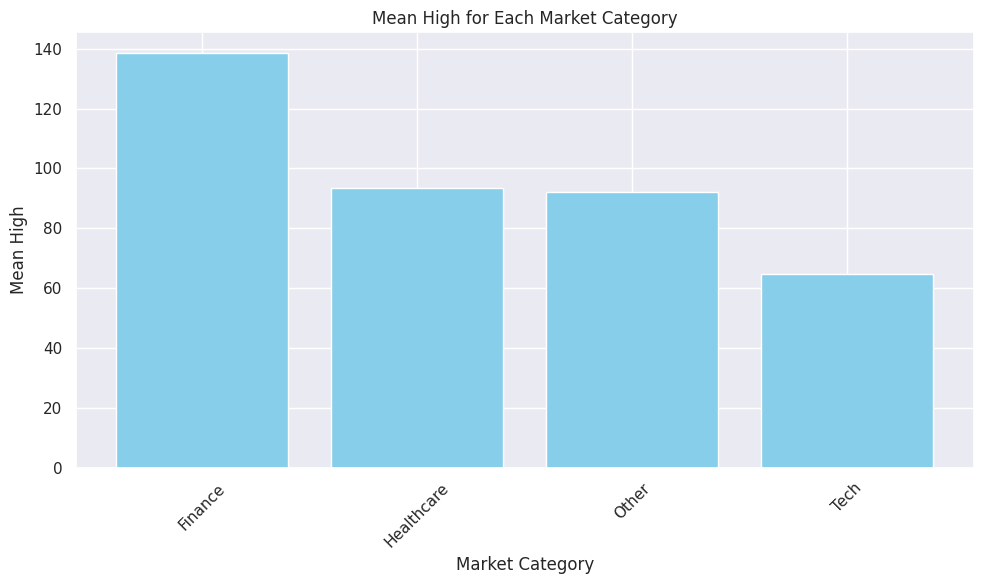

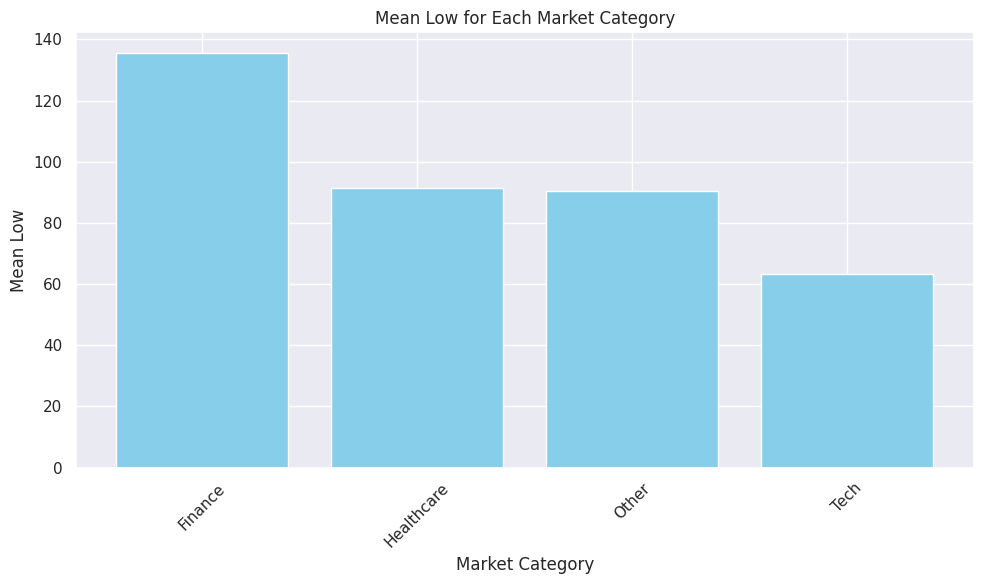

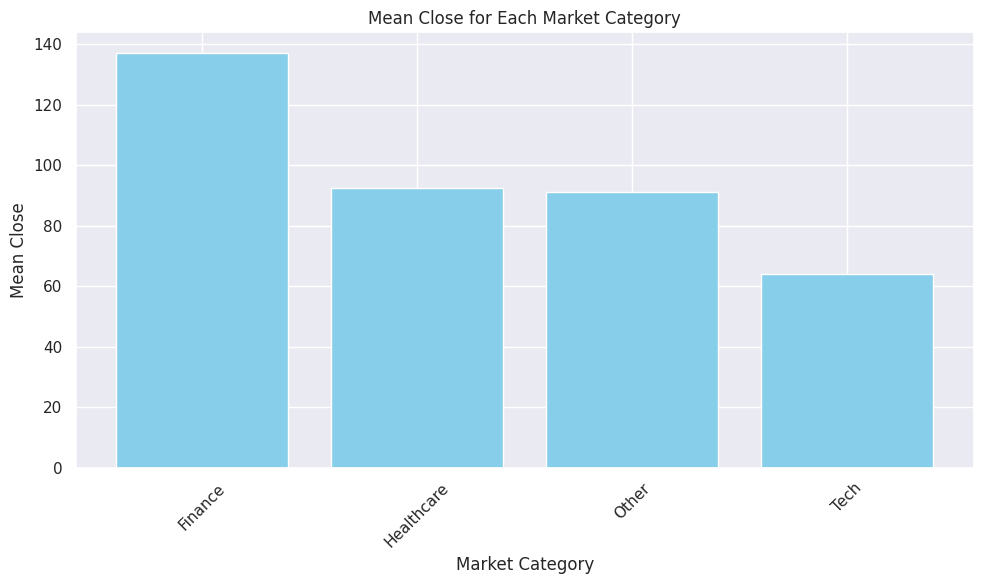

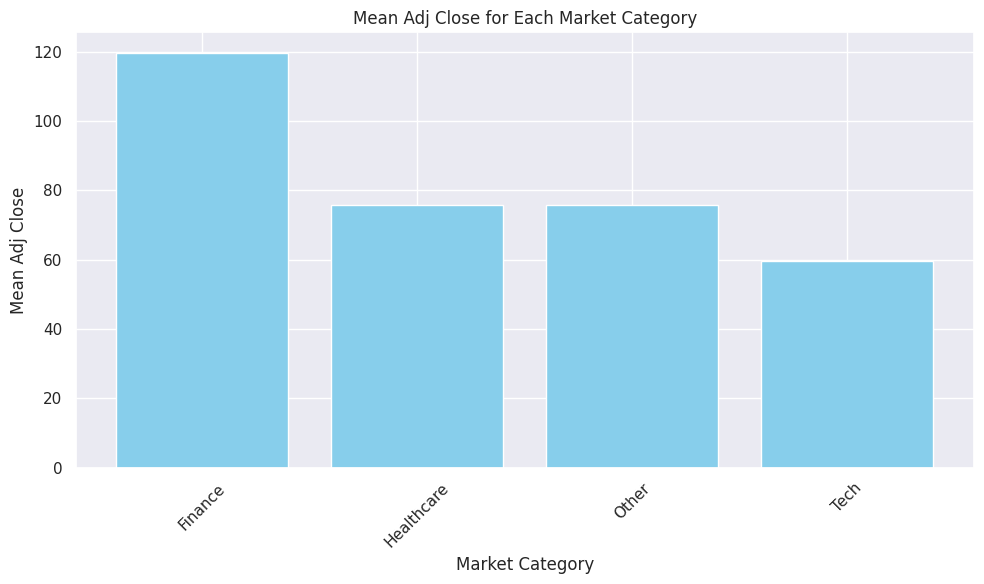

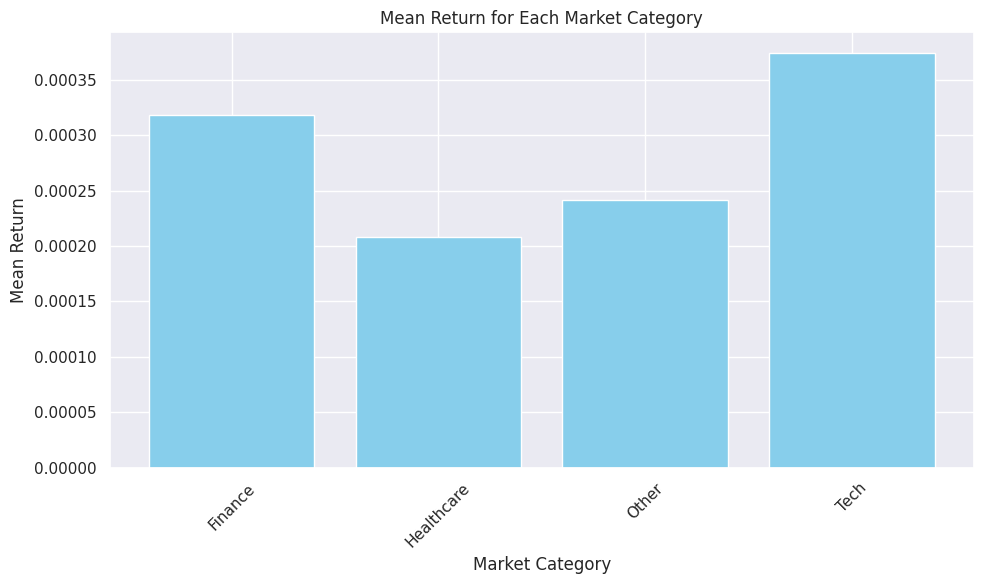

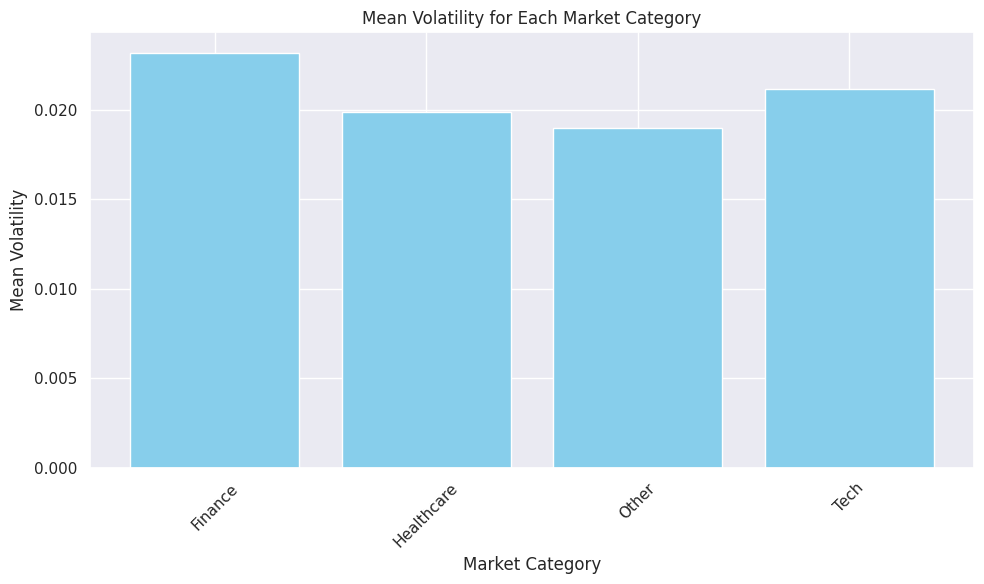

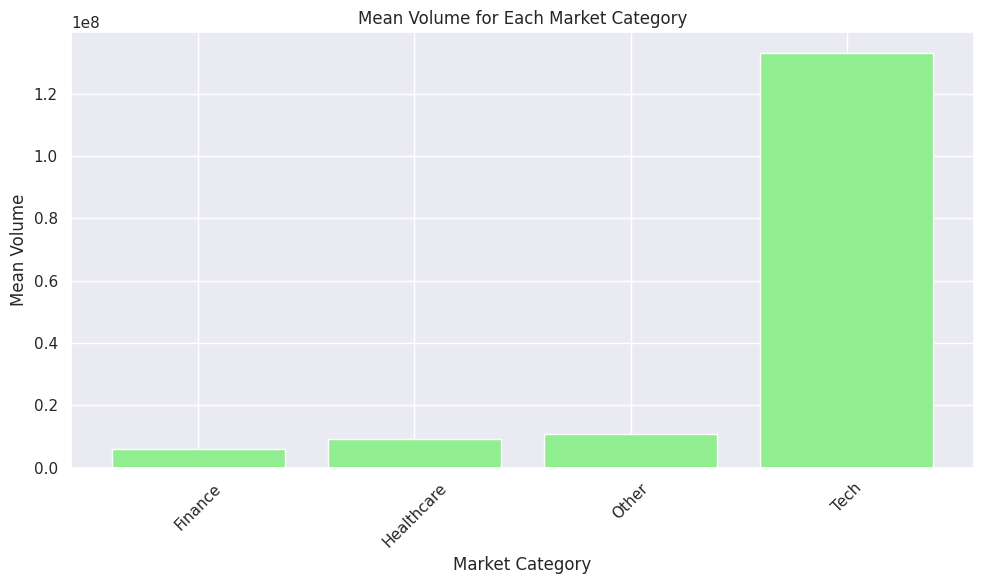

In [58]:
import matplotlib.pyplot as plt

# Selecting comparable columns
comparable_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Return', 'Volatility', 'Volume']

# Group by 'Market Category' and calculate the mean
mean_data = df.groupby('Market Category')[comparable_columns].mean()

# Plotting bar chart for each comparable column
for column in comparable_columns:
    plt.figure(figsize=(10, 6))
    plt.bar(mean_data.index, mean_data[column], color='lightgreen' if column == 'Volume' else 'skyblue')
    plt.title(f'Mean {column} for Each Market Category')
    plt.xlabel('Market Category')
    plt.ylabel(f'Mean {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**Price Levels (Open, High, Low, Close, Adj Close):**
Finance category has the highest average price levels among all categories, followed by Healthcare, Other, and Tech.
This suggests that stocks in the Finance category generally have higher prices compared to those in other categories.

**Volume:**
Tech category has the highest average trading volume, significantly higher than the other categories.
This indicates that there is generally higher trading activity in the Tech category compared to Finance, Healthcare, and Other categories.

**Return:**
The average return is relatively consistent across all categories, with Tech having the highest average return.
This suggests that while there may be differences in price levels and trading volume, the average returns are comparable across categories.

**Volatility:**
Finance category has the highest average volatility, followed by Tech, Other, and Healthcare.
This implies that stocks in the Finance category tend to experience larger price fluctuations compared to those in other categories, indicating higher risk.

**Year:**
The average year is similar across all categories, indicating that the data spans multiple years without significant variation in the average year.
